In [1]:
# Skill Pay Analysis

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


c:\Anaconda3\envs\project_python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_ind_da = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

df_ind_da = df_ind_da.dropna(subset='salary_year_avg')

df_ind_da


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,"[python, sql, aws, azure, excel, jenkins, git]","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
27487,Data Analyst,Data Architect 2023,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-12 13:14:51,True,False,India,year,165000.0,NaN,Bosch Group,"[mongo, sql, python, mongodb, mongodb, sql ser...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
29583,Data Analyst,Senior Business & Data Analyst,India,via Ai-Jobs.net,Full-time,False,India,2023-11-21 13:12:12,False,False,India,year,119250.0,NaN,Deutsche Bank,"[sql, visio, excel, jira, confluence]","{'analyst_tools': ['visio', 'excel'], 'async':..."
32890,Data Analyst,Data Analyst - Transport,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 13:34:25,True,False,India,year,105000.0,NaN,GoTo Group,"[sql, swift, tableau, git]","{'analyst_tools': ['tableau'], 'other': ['git'..."
41257,Data Analyst,Junior Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-08-08 06:13:06,False,False,India,year,57500.0,NaN,WPP,"[sql, alteryx]","{'analyst_tools': ['alteryx'], 'programming': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774606,Data Analyst,Financial Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-04-11 01:10:35,False,False,India,year,79200.0,NaN,Visa,"[python, r, vba, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
774809,Data Analyst,IN RBIN Dy. Manager/ Asst Manager Data Analyst...,"Nashik, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-28 01:21:16,False,False,India,year,102500.0,NaN,Bosch Group,"[python, sql, pandas, numpy, excel, sharepoint]","{'analyst_tools': ['excel', 'sharepoint'], 'li..."
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,"[sql, python, r, spark, express, excel, looker...","{'analyst_tools': ['excel', 'looker', 'powerpo..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"


In [3]:
df_ind_da = df_ind_da.explode('job_skills')
df_ind_da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,python,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,sql,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,aws,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,azure,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,excel,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,looker,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,powerpoint,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,power bi,"{'analyst_tools': ['power bi', 'tableau']}"
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,tableau,"{'analyst_tools': ['power bi', 'tableau']}"


In [4]:
df_ind_da_top_pay = df_ind_da.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending= False)

df_ind_da_top_pay = df_ind_da_top_pay.head(10)

df_ind_da_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [5]:
df_ind_da_top_demand = df_ind_da.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending= False)

df_ind_da_top_demand = df_ind_da_top_demand.head(10).sort_values(by='median',ascending=False)

df_ind_da_top_demand


,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


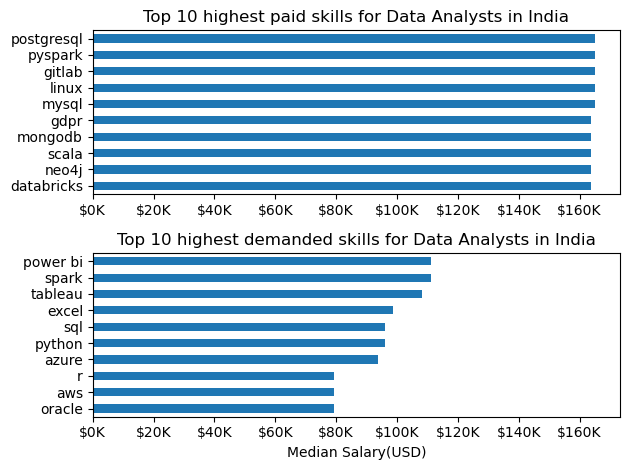

In [6]:
fig,ax = plt.subplots(2,1)

df_ind_da_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 highest paid skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))





df_ind_da_top_demand[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 highest demanded skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary(USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))



plt.tight_layout()
plt.show()




In [7]:
import seaborn as sns


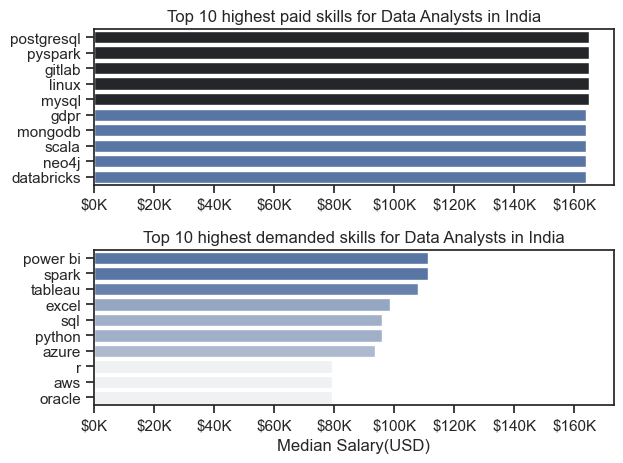

In [12]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

sns.barplot(data=df_ind_da_top_pay ,x='median', y=df_ind_da_top_pay.index ,hue='median',ax=ax[0], palette= 'dark:b_r')
ax[0].legend().remove()
# df_ind_da_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 highest paid skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))




sns.barplot(data=df_ind_da_top_demand , x='median', y=df_ind_da_top_demand.index , hue='median' , ax=ax[1], palette= 'light:b') 
ax[1].legend().remove()
# df_ind_da_top_demand[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 highest demanded skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary(USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))



plt.tight_layout()
plt.show()
